### LDA and PCA for dimensionality reduction on Iris Dataset

In [1]:
#importing libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#loading in the data
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
#separating features and labels
X = iris.data
y = iris.target

In [9]:
#importing standard scaler to scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [15]:
#applying PCA on scaled data
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
#applying LDA on original data
lda = LinearDiscriminantAnalysis(n_components = 2, solver = 'svd')
X_lda = lda.fit_transform(X,y)

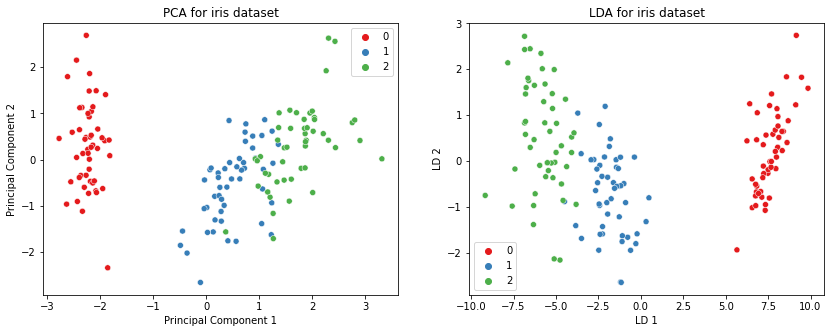

In [21]:
#plotting the results
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (14,5))

#creating scatterplots
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue = y, ax = ax[0],palette = 'Set1')
sns.scatterplot(X_lda[:,0],X_lda[:,1],hue = y, ax = ax[1],palette = 'Set1')

#setting titles
ax[0].set_title('PCA for iris dataset')
ax[1].set_title('LDA for iris dataset')

#setting labels
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[1].set_xlabel('LD 1')
ax[1].set_ylabel('LD 2')

plt.show()

---

### Truncated SVD and PCA for iris dataset

In [14]:
#importing libraries
from sklearn.decomposition import TruncatedSVD

In [17]:
#applying truncated svd on the dataset
svd = TruncatedSVD(n_components = 2)
X_svd = svd.fit_transform(X_scaled)

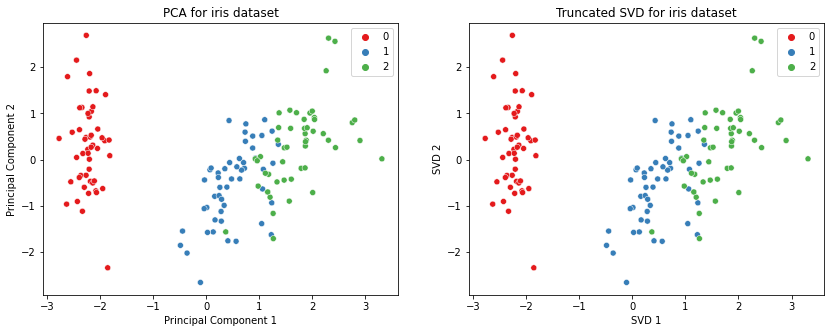

In [22]:
#plotting the results
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (14,5))

#creating scatterplots
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue = y, ax = ax[0],palette = 'Set1')
sns.scatterplot(X_svd[:,0],X_svd[:,1],hue = y, ax = ax[1],palette = 'Set1')

#setting titles
ax[0].set_title('PCA for iris dataset')
ax[1].set_title('Truncated SVD for iris dataset')

#setting labels
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[1].set_xlabel('SVD 1')
ax[1].set_ylabel('SVD 2')

plt.show()

---

### RBF kernel PCA on synthetic non-linear data

In [23]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 1000, random_state = 0)

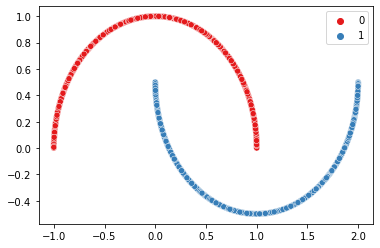

In [24]:
#plotting the data
sns.scatterplot(X[:,0],X[:,1],hue = y, palette = 'Set1')
plt.show()

As we can see the data is not linearly separable

In [25]:
#applying PCA and kernel PCA on the data
from sklearn.decomposition import KernelPCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15, random_state = 0)
X_kpca = kpca.fit_transform(X)

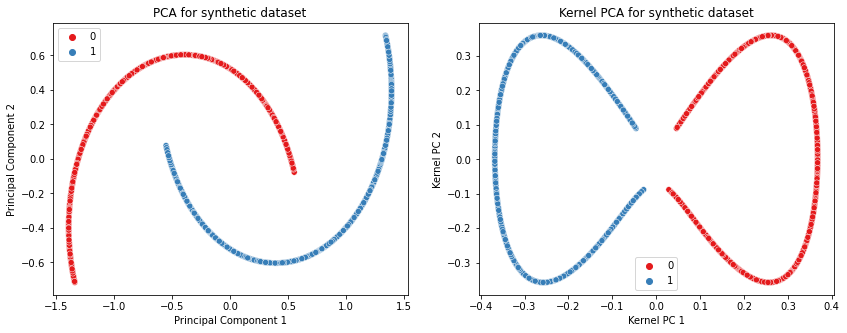

In [26]:
#plotting the results
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (14,5))

#creating scatterplots
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue = y, ax = ax[0],palette = 'Set1')
sns.scatterplot(X_kpca[:,0],X_kpca[:,1],hue = y, ax = ax[1],palette = 'Set1')

#setting titles
ax[0].set_title('PCA for synthetic dataset')
ax[1].set_title('Kernel PCA for synthetic dataset')

#setting labels
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[1].set_xlabel('Kernel PC 1')
ax[1].set_ylabel('Kernel PC 2')

plt.show()

As we can clearly see, the 2 classes are linearly separable after applying kernel PCA

### PCA and t-SNE on MNIST dataset

In [29]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

In [30]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [31]:
X = digits.data
y = digits.target

In [61]:
#scaling the data and applying PCA to 2 dimension
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

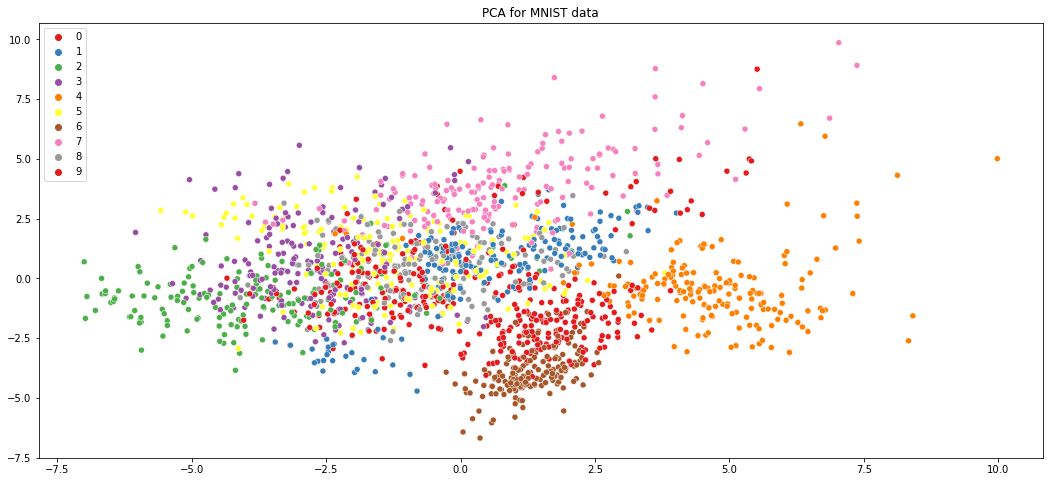

In [62]:
#plotting results from pca
plt.figure(figsize = (18,8))
sns.scatterplot(X_pca[:,0],X_pca[:,1],hue = y, palette = 'Set1')
plt.title('PCA for MNIST data')
plt.show()

As we can see, PCA hasn't done well with regards to class segregation. 

In [38]:
#scaling the data and applying PCA before t-SNE
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components = 20)
X_pca = pca.fit_transform(X_scaled)

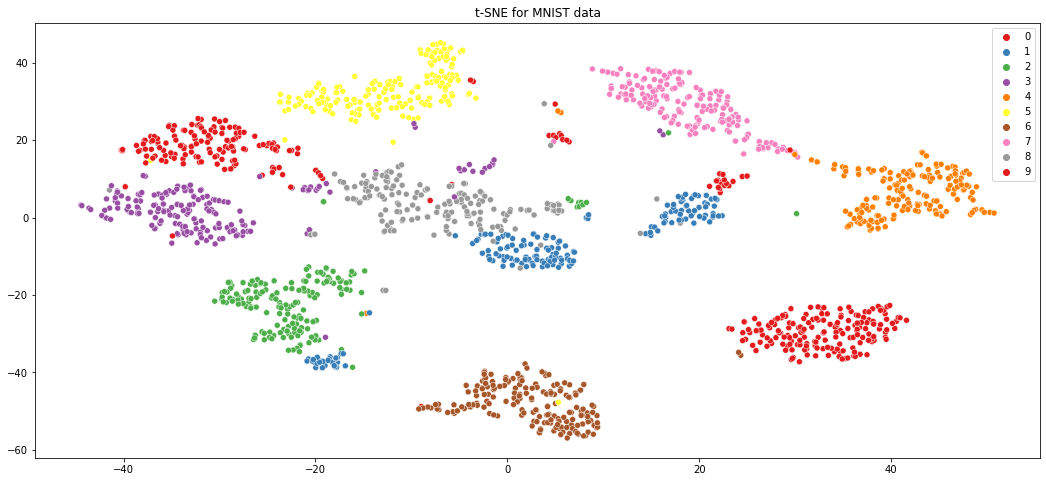

In [39]:
#applying t-SNE
tsne = TSNE(n_components = 2,random_state = 0)
X_tsne = tsne.fit_transform(X_pca)

#plotting
plt.figure(figsize = (18,8))
sns.scatterplot(X_tsne[:,0],X_tsne[:,1],hue = y, palette = 'Set1')
plt.title('t-SNE for MNIST data')
plt.show()

We can alter the n_components in PCA() and get different results

---

### Multi Dimensional Scaling (MDS) on MNIST dataset

In [40]:
from sklearn.manifold import MDS

In [41]:
X = digits.data
y = digits.target

In [56]:
#applying metric MDS
mds = MDS(n_components = 2, metric = True,random_state = 0)
X_mds = mds.fit_transform(X)

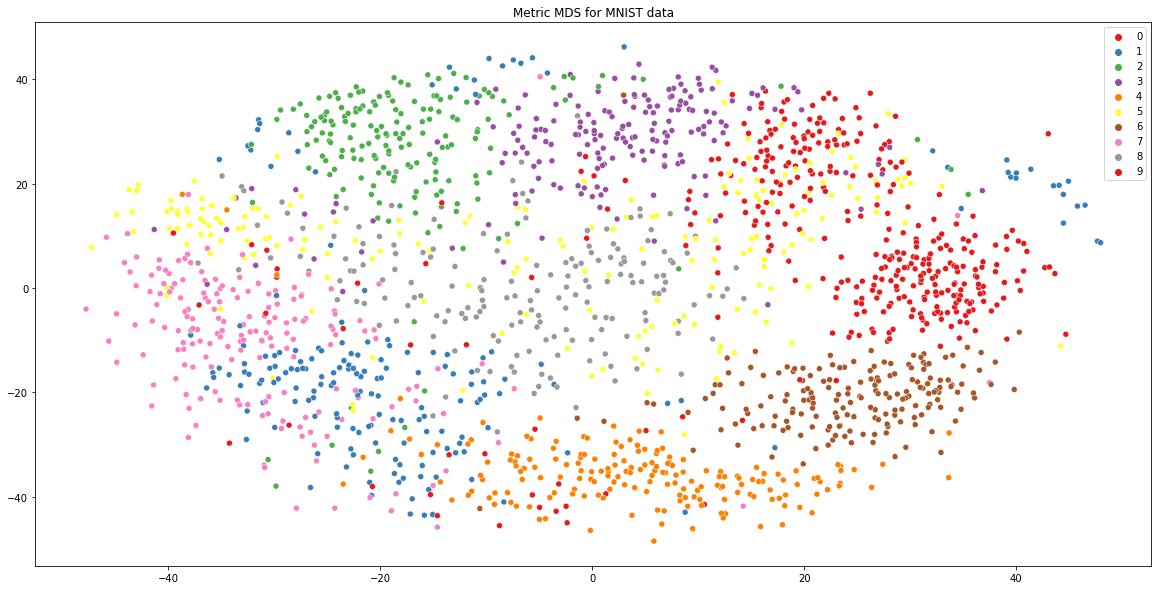

In [59]:
#plotting the results
plt.figure(figsize = (20,10))
sns.scatterplot(X_mds[:,0],X_mds[:,1],hue = y, palette = 'Set1')
plt.title('Metric MDS for MNIST data')
plt.show()

In [66]:
#applying non-metric MDS
mds = MDS(n_components = 2, metric = False,random_state = 0)
X_mds = mds.fit_transform(X)

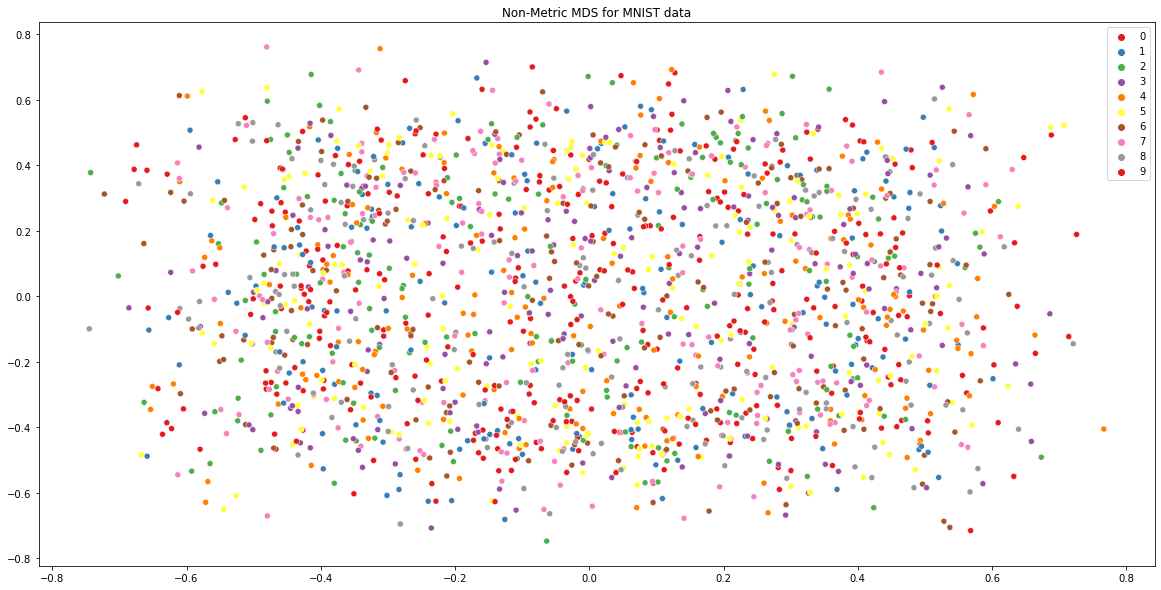

In [67]:
#plotting the results
plt.figure(figsize = (20,10))
sns.scatterplot(X_mds[:,0],X_mds[:,1],hue = y, palette = 'Set1')
plt.title('Non-Metric MDS for MNIST data')
plt.show()

Clearly we can see that non-metric MDS hasn't performed well

---

### Isometric mapping (Isomap) on MNIST

In [63]:
X = digits.data
y = digits.target

In [64]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors = 5, n_components = 2)
X_iso = iso.fit_transform(X)

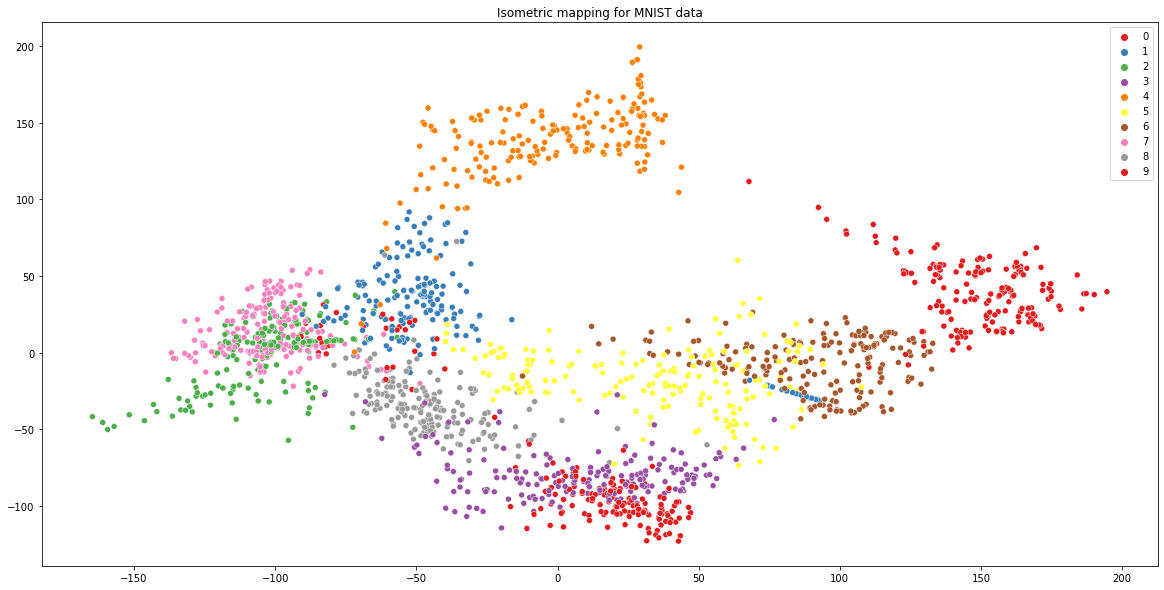

In [65]:
#plotting the results
plt.figure(figsize = (20,10))
sns.scatterplot(X_iso[:,0],X_iso[:,1],hue = y, palette = 'Set1')
plt.title('Isometric mapping for MNIST data')
plt.show()